In [1]:
from si import *
enable_atlas_python()
from labellines import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.22/00
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
def resonanceLine(n,m,l):
    '''
        Returns a x,y array of a resonance given by values of a tune
    '''
    xpoints = np.linspace(-1,1,100)
    if(m != 0):
        ypoints = (l - n*xpoints)/m
    else:
        ypoints = np.ones_like(xpoints)
    return(xpoints, ypoints)

def operatingPoint(npoints):
    t = np.linspace(0,2*np.pi,npoints)
    x = np.cos(t)
    y = np.sin(t)
    return x,y

def tunePoint(n):
    assert (n < 1 and n > 0)
    return np.sqrt(1-n), np.sqrt(n)

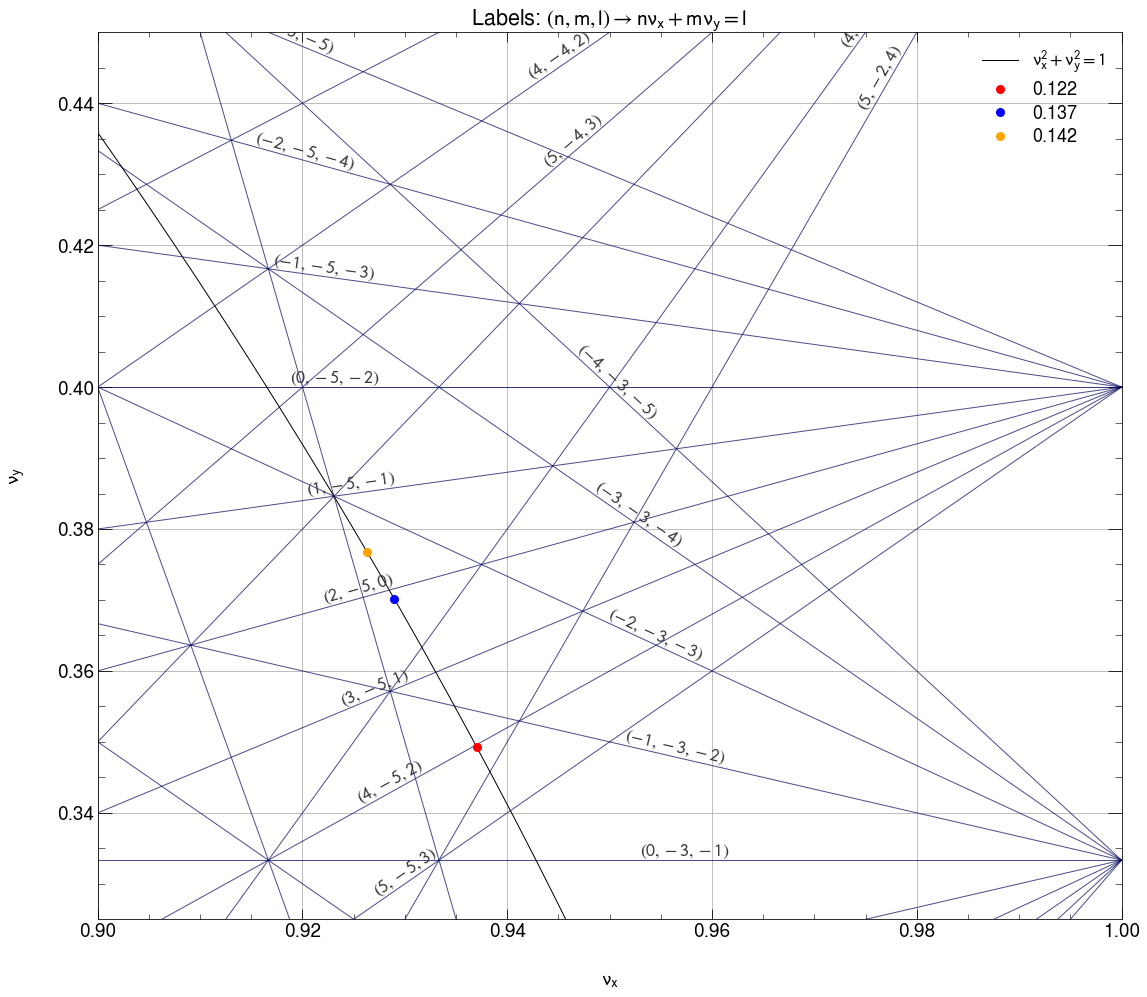

In [18]:
fig,ax = plt.subplots(figsize=(18,16))
maxnum = 5
ding = np.array(np.meshgrid(np.linspace(-1*maxnum,maxnum,2*maxnum+1),
                            np.linspace(-1*maxnum,maxnum,2*maxnum+1),
                            np.linspace(-1*maxnum,maxnum,2*maxnum+1)), dtype=int)
# print(ding[0][0])
lines = []
for n,l,m in ding.T.reshape(-1,3):
    if(m != 0 ):#and (np.abs(n)+np.abs(l)+np.abs(m) < 10) and not(m < 0 and int(l) == 0)):
        thisline = resonanceLine(n,m,l)
        drawLine = True
        for line in lines:
            if( (line[1][0] == thisline[1][0]) and (line[1][len(line[1])-1] == thisline[1][len(thisline[1])-1]) ):
                drawLine = False
                break
        if(drawLine):
            lines.append( thisline )
            plt.plot(*thisline, color="xkcd:dark blue", alpha=0.7,label=f"$({n},{m},{l})$")
#         break

# tunes = [
#     [0,2,1],
#     [-4,1,-1]
# ]
# for n,m,l in tunes:
#     plt.plot(*resonanceLine(n,m,l), color="xkcd:light grey")

plt.xlim(0.9,1)
plt.ylim(0.325,0.45)

ax.patch.set_facecolor('red')
ax.patch.set_alpha(0)

labelLines(plt.gca().get_lines(),
           zorder=2.5, 
           shrink_factor=0.1, 
           drop_label=True, 
#            fontsize=6,
           color='xkcd:dark grey',
#            backgroundcolor='white',
#            alpha=0
           verticalalignment="bottom",
           horizontalalignment="left", rotation_mode="anchor"
          )

plt.plot(*operatingPoint(1000),color="black",label=r"$\nu_{x}^2 + \nu_{y}^2 = 1$")

plt.plot(*tunePoint(0.122), "o", color="red", label="0.122" )
plt.plot(*tunePoint(0.137), "o", color="blue", label="0.137" )
plt.plot(*tunePoint(0.142), "o", color="orange", label="0.142" )

plt.grid()
plt.legend()
plt.xlabel(r"$\nu_{x}$")
plt.ylabel(r"$\nu_{y}$")
plt.title(r"Labels: $ (n,m,l) \rightarrow n \nu_{x} + m \nu_{y} = l  $ ")

plt.show()